<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/xlm_r/xlm_r_explore_vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup
--------------------------

In [1]:
!pip install transformers -Uqq
!pip install sentencepiece -Uqq

     |████████████████████████████████| 1.4MB 4.2MB/s 
     |████████████████████████████████| 890kB 49.0MB/s 
     |████████████████████████████████| 2.9MB 41.6MB/s 
     |████████████████████████████████| 1.1MB 5.6MB/s 


In [36]:
import torch
import pandas as pd
import sentencepiece as spm
from transformers import XLMRobertaTokenizer
from transformers import BertTokenizer

# download the tokenizer for the XLM-Robert base model
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

## Inspect XLM-R Vocabulary
--------------------------

### Vocabulary Dump

In [7]:
# retrieve the full list of tokens
all_tokens = list(tokenizer.get_vocab().keys())
print(f'The vocabulary contains {len(all_tokens):,} tokens.')

The vocabulary contains 250,002 tokens.


In [14]:
all_tokens[:5], all_tokens[-5:]

(['<s>', '<pad>', '</s>', '<unk>', ','], ['蜘', '踴', 'ấ', '稣', '<mask>'])

## SentencePiece vs. WordPiece
------------------------------

XLM-R uses a `SentencePiece` model, which is a little different than BERT's WordPiece model.

As an example, I'll use a misspelling of the word "philosophy": "philosphy". This will cause the tokenizer to break the word into subwords.

In WordPiece, subwords are denoted by two hash characters, except the *first* subword in a word. 

```
 BERT /     WordPiece:  phil  ##os  ##phy
XLM-R / SentencePiece:	▁phil   os    phy
```

In SentencePiece, all spacing is captured.

> Note: The marking character used by SentencePiece looks like an underscore, but it as actually unicode symbol U+2581, named "Lower One Eighth Block". I'll refer to it as an underscore for simplicity, though.
* Underscore: _
* U+2581: ▁

With SentencePiece, you can interpret the underscore as a space, because that's exactly what it represents! 

In [32]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
example_sentence = 'The reactions were unexpectedly uplifting and spontaneous. Just welcoming and inviting!'
xlmr_tokens = tokenizer.tokenize(example_sentence)
bert_tokens = bert_tokenizer.tokenize(example_sentence)

In [19]:
def print_as_rows(list_a, list_b):
    '''
    Prints two lists as rows, with padding to make them line up neatly.
    '''
    row_a = ""
    row_b = ""

    # Pad the lists to the same length.
    while len(list_a) < len(list_b):
        list_a.append("")
    while len(list_b) < len(list_a):
        list_b.append("")
    
    for i in range(0, len(list_a)):
        str_a = list_a[i]
        str_b = list_b[i]

        pad_len = max(len(str_a), len(str_b)) + 2
    
        row_a += ("{:>{width}}").format(str_a, width=pad_len)
        row_b += ("{:>{width}}").format(str_b, width=pad_len)
    
    print(row_a)
    print(row_b)

In [33]:
print_as_rows(xlmr_tokens, bert_tokens)

  ▁The  ▁reaction     s         ▁were  ▁unexpected         ly  ▁up      lifting  ▁and  ▁spontane        ous    .     ▁Just  ▁wel  com  ing  ▁and  ▁invit  ing  !
   The  reactions  were  unexpectedly           up  ##lifting  and  spontaneous     .       Just  welcoming  and  inviting     !                                


In [37]:
pd.DataFrame([xlmr_tokens, bert_tokens])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,▁The,▁reaction,s,▁were,▁unexpected,ly,▁up,lifting,▁and,▁spontane,ous,.,▁Just,▁wel,com,ing,▁and,▁invit,ing,!
1,The,reactions,were,unexpectedly,up,##lifting,and,spontaneous,.,Just,welcoming,and,inviting,!,,,,,,


### Token Lengths
Let's gather some statistics on the vocabulary.

Maximum token length: 16 




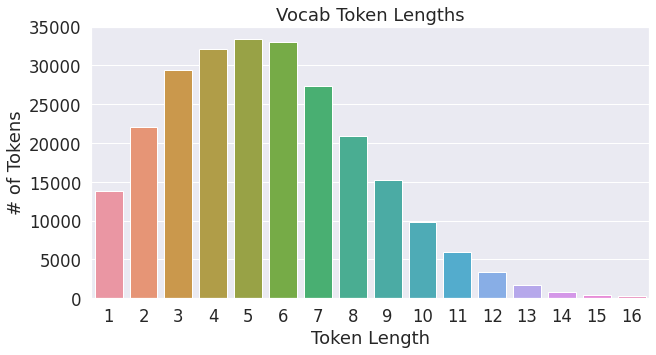

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in all_tokens]

# Plot the number of tokens of each length.
sns.countplot(x=token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens');

print('Maximum token length:', max(token_lengths), '\n\n')